In [7]:
#Where am i
!pwd

/global/u2/c/chanun/cosmic_voids/doc


In [3]:
#docker has vide void env
#usual imports 

import os, math, shutil, pdb, sys
import vide
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

#getarray is in vide and it retrieves an array of an attribute from the catalog 
%matplotlib inline

In [9]:
#edited functions of VIDE will be in py
repodir = '/global/homes/c/chanun/cosmic_voids/py'
sys.path.append(repodir)
from cosmic_voids import plotting

## Set up ##

To get the example simulation
1. mkdir vide_test
2. cp vide_public/python_tools/void_pipeline/datasets/example_simulation.py vide_test/ 
3. mkdir vide_test/examples
4. cp vide_public/examples/example_simulation_z0.0.dat vide_test/examples
5. cd $HOME/vide_test 
6. vide_prepare_simulation --all --parm example_simulation.py 
7. python3 -m void_pipeline example_simulation/sim_ss1.0.py 

In [ ]:
#do this once if test simulations is needed

#below are the same steps that can be done in the notebook
#above is for terminals

#made our directories 
#vtestpath = 'vide-test'
#os.makedirs(vtestpath, exist_ok=True)

#vtestpath2 = 'vide-test/examples'
#os.makedirs(vtestpath2, exist_ok=True)

#copying the needed files
#shutil.copy('/src/vide/python_tools/void_pipeline/datasets/example_simulation.py', vtestpath)
#shutil.copy('/src/vide/examples/example_simulation_z0.0.dat', vtestpath2)

In [11]:
%cd vide-test

/global/u2/c/chanun/cosmic_voids/py/vide-test


In [6]:
!vide_prepare_simulation --all --parm example_simulation.py 
#sim parameters

 Loading parameters from example_simulation.py
 Doing subsample 1.0 scripts
 Done!


In [7]:
!python3 -m void_pipeline example_simulation/sim_ss1.0.py
#Search of the named module and runs the corresponding .py file as a script.

 Loading parameters from example_simulation/sim_ss1.0.py
ZOBOV_PATH is  /usr/local/lib/python3.8/dist-packages/vide-2.0-py3.8-linux-x86_64.egg/vide/bin/
 Cleaning out log files...
 Working with data set sim_ss1.0_z0.00_d00 ...
  Extracting tracers from catalog... done
  Extracting voids with ZOBOV... done
  Taking data portions ... done

 Done!


## Load catalog ##

In [12]:
#I decided to move back
%cd .. 

/global/u2/c/chanun/cosmic_voids/py


In [4]:
#this is where the vide outputs are 
path = 'vide-test/examples/example_simulation/sim_ss1.0/sample_sim_ss1.0_z0.00_d00'
#path for figures
figpath = 'vide-test/figs'

In [5]:
#loading out catalog
#these are all voids
cen_trim = vide.loadVoidCatalog(path, dataPortion="central", loadParticles=True,untrimmed=False)

Loading info...
Loading voids...
Read 2202 voids
Loading macrocenters...
Loading derived void information...
Loading all particles...
    Loading particle data...
Loading volumes...
Loading zone-void membership info...
Loading particle-zone membership info...


In [6]:
cen_untrim = vide.loadVoidCatalog(path, dataPortion="central", loadParticles=True,untrimmed=True)

Loading info...
Loading voids...
Read 3061 voids
Loading macrocenters...
Loading derived void information...
Loading all particles...
    Loading particle data...
Loading volumes...
Loading zone-void membership info...
Loading particle-zone membership info...


In [ ]:
#filter functions; all returns catalog, 5 total

#need to reload catalog after filtering if you want to work with the full set
#cen_trim becomes the filtered catalog 

#1.
#catalog.voids[].radius
#rvc = vide.filterVoidsOnSize(cen_trim, 50)
#print(len(rvc.voids))
#312

#2.
#vide.filterVoidsOnTreeLevel(catalog, level):

#3.
#all 0.0 in the trimmed catalog 
#catalog.voids[].centralDen
#vide.filterVoidsOnCentralDen(cen_untrim, 0.71)
#print(len(cen_trim.voids))
#2701

#4.
#catalog.voids[].coreDens
#vide.filterVoidsOnCoreDen(cen_trim, 0.23)
#print(len(cen_trim.voids))
#941

#5.
#catalog.voids[].densCon
#vide.filterVoidsOnDenCon(cen_trim, 1.8)
#print(len(cen_trim.voids))
#68

In [7]:
#list of catalogs
vlist = [cen_trim,cen_untrim]

## Plots ##

Plotting number function


/global/u2/c/chanun/cosmic_voids/py/vide2/plotting.py:67: RuntimeWarning: divide by zero encountered in log10
  mean = np.log10(hist/boxVol)
/global/u2/c/chanun/cosmic_voids/py/vide2/plotting.py:68: RuntimeWarning: divide by zero encountered in log10
  lowerbound = np.log10(lowerbound/boxVol)
/global/u2/c/chanun/cosmic_voids/py/vide2/plotting.py:69: RuntimeWarning: divide by zero encountered in log10
  upperbound = np.log10(upperbound/boxVol)


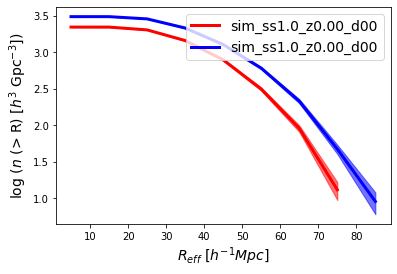

In [13]:
#cummulative histogram
#on the y axis we have the number of voids with radii above R_eff
#on the x axis we have R_eff

plotting.plotnumfunction(vlist,figDir=figpath,binWidth=10);

#error msg is due to inf values (inifity) but the code below
#removes those values from our plots
#as expcted, larger voids are harder to find

Figure 1. Cummulative Number Function: Cumulative void number functions from the mock catalogs. On the x-axis we have $R_{eff}$ and number of voids with radii above $R_{eff}$ on the y-axis; y-axis is in log space. Shown are abundances for trimmed, central voids (red) and untrimmed, central (blue). The solid lines are the measured number functions and the shaded regions are the 1$\sigma$ Poisson uncertainties. Volume normalizations are handled automatically. Caption adapted from Figure 5 Stutter et al. 2014.

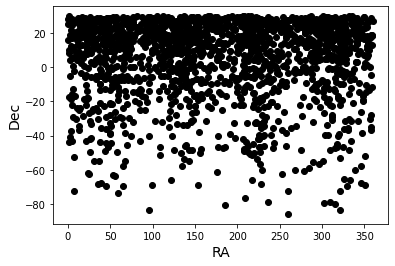

In [136]:
#lets look at the positions of our voids
for i in range(len(cen_trim.voids)):
        plt.plot(cen_trim.voids[i].RA,cen_trim.voids[i].Dec,'ko')
    
plt.xlabel('RA',fontsize=14)
plt.ylabel('Dec',fontsize=14);

In [19]:
#we loop bc we cant just plot catalog.voids.RA

#below is a catalog
print(type(cen_trim))

#below is a list
print(type(cen_trim.voids))

#list does not have attribute .RA
#print(type(cen_trim.voids.RA))

#class Bunch
print(type(cen_trim.voids[0]))

#below is the RA so it's a float
print(type(cen_trim.voids[0].RA))

<class 'vide.voidUtil.catalogUtil.Catalog'>
<class 'list'>
<class 'vide.voidUtil.catalogUtil.Bunch'>
<class 'float'>


1672 1672 2202
fraction of voids with dec: 0.7593


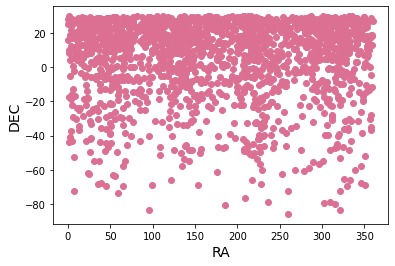

In [144]:
#there are voids that do not have a dec, but why
#all have a RA, can easily be checked again

nx = []
ny = []

for i in range(len(cen_trim.voids)):
    #nan are floats 
    if math.isnan(cen_trim.voids[i].Dec):
        pass
    else:
        nx.append(cen_trim.voids[i].RA)
        ny.append(cen_trim.voids[i].Dec)
        
        
print(len(ny),len(nx),len(cen_trim.voids))
#cen_trim.numVoids also gives the number of voids
print(f'fraction of voids with dec: {len(ny)/len(cen_trim.voids):.4}')
#roughly 76% 

#same plot as above
plt.plot(nx,ny,'o',color='palevioletred')
plt.ylabel('DEC',fontsize=14)
plt.xlabel('RA',fontsize=14);

Plotting ellipticity distributions


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


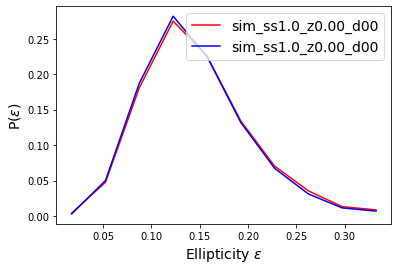

In [23]:
#plots ellipticity distributions
vide.plotEllipDist(vlist,figDir=figpath,plotName='ellipdist')
#starts figure, labels axis
#turns cataloglist into an array
#enumerate array (returns index and then catalog)
#extracts sampleInfo from catalog(s) and the ellipticity of each void in an array
#makes dataweights, 1/length(ellipticty_array)
#makes a histogram with ellipticity_array where each element only contributes the same amount as in dataweights

#error has to do with the eps script output

#y axis from histogram is the same as in here
#x is the bin centers (edges are the other outputs to np.hist)

Figure 2. Ellipticity Distributions. 

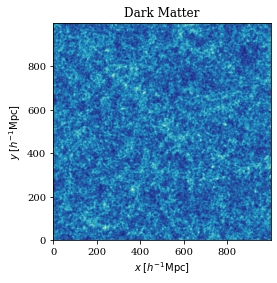

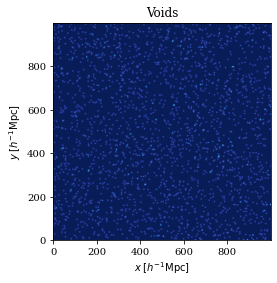

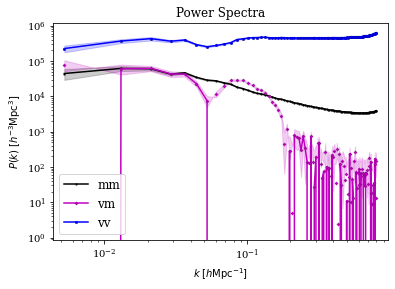

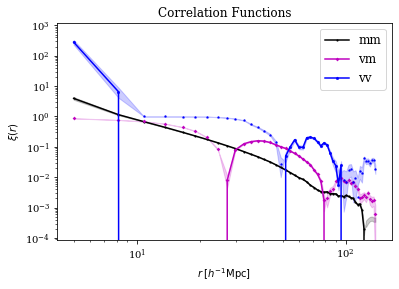

In [24]:
#takes a minute to run
#get boxlength, particle position (?), macrocenter
#interpolate to mesh via cic
#then fourier transform of the stacked histogramdd of particle positions(?)
#then we get the power spectra and correlation functions

plotting.computeXcor(cen_trim,figDir=figpath)

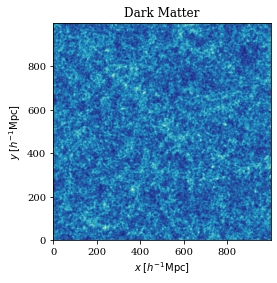

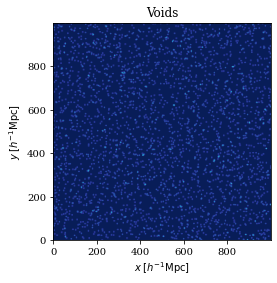

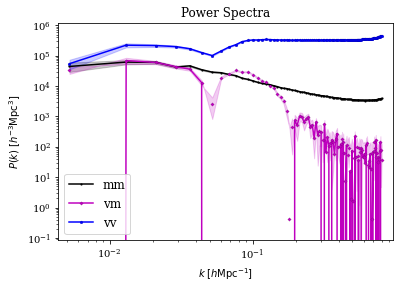

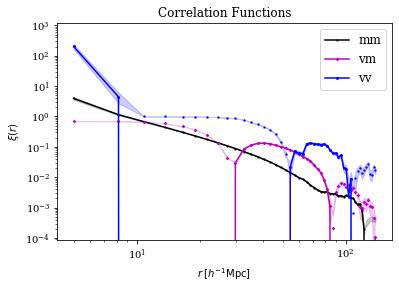

In [26]:
plotting.computeXcor(cen_untrim,figDir=figpath)

Caption: VIDE allows users to compute the power spectra and correlation function of a given catalog. VIDE first reads in particle positions and uses a cloud-in-cell mesh interpolation scheme to create a 3D density field of fluctuations then the Fourier modes are computed using an FFT. The angle-averaged power spectrum is then estimated. An inverse Fourier transform of the power spectrum yields the correlation function. This can be done for void centers and and tracer particles (the cross-power spectrum and cross-correlation function are also computed). Shaded bands show 1$\sigma$-uncertainties estimated from scatter in the bin average.  Caption adapted from Stutter et al. 2014.

In [27]:
cen_trim.boxLen
#probably x,y,z

array([999.983, 999.983, 999.98 ])

In [31]:
#vide.expansion #returns 1/E(z) ; E(z) dimensionless hubble parameter
#vide.angularDiameter #returns ang diameter distance
#vide.aveExpansion #returns average expected expansion for a given redshift range

<function vide.apTools.chi2.cosmologyTools.aveExpansion(zStart, zEnd, Om=0.27, Ot=1.0, w0=-1.0, wa=0.0)>

In [34]:
vide.expansion(0.2)

0.9141821974082446

In [38]:
#not sure what the arguments are
#redshift, omega matter, ???, ???, ??? 
vide.aveExpansion(0.2,0.5)

1.1805667870661896

"launches" a bunch of functions, I think this is what gets us the data
- 'launchGenerate' - wrote out sample_info.txt
-'launchPrune' 
-'launchVelocityStack'
-'launchVoidOverlap'
-'launchZobov'-runs ZOBOV and writes out a file of the process

In [8]:
#builds stacked radial density profile from catalog
#takes catalog, min and max void radii, number of bins in profile

# returns:
#   binCenters: array of radii in binned profile
#   stackedProfile: the stacked density profile
#   sigmas: 1-sigma uncertainty in each bin
#retreives catalog info, retrieved particle tree
#"stacks" voids with desired radius 

bincen, stack, sigma = vide.buildProfile(cen_trim,31,85,50)

  Building particle tree...
  Selecting voids to stack...
  Stacking voids...


In [57]:
from statistics import mean,median

s = sigma[3:] #we dont want to 0's
r = bincen[3:]
d = stack[3:]

mr = median(r)
er = mean(r)
md = mean(d)

x = r/mr
y = d/md

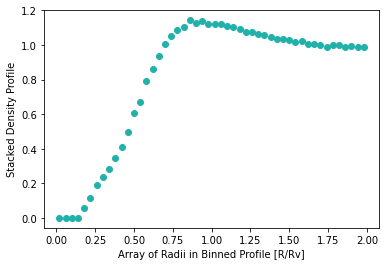

In [68]:
#plt.errorbar(r, d,yerr=s,color='lightseagreen',fmt='o')
plt.plot(bincen/median(bincen),stack,'o',color='lightseagreen')
plt.xlabel('Array of Radii in Binned Profile [R/Rv]')
plt.ylabel('Stacked Density Profile');

In [60]:
#The statistical average void density profile
# fits the given density profile to the HSW function
#   radii: array of radii
#   densities: array of densities in units of mean density
#   sigmas: array of uncertainties
#   rV: mean effective void radius
# 
# returns:
#   popt: best-fit values of rs and dc
#   pcov: covariance matrix
#   rVals: array of radii for best-fit curve
#   hswProfile: array of densities for best-fit curve in units of mean density

popt, pcov, radii, hswprofile = vide.fitHSWProfile(r,y, s, er)

Text(0, 0.5, 'Densities for best fit curve in units of mean density')

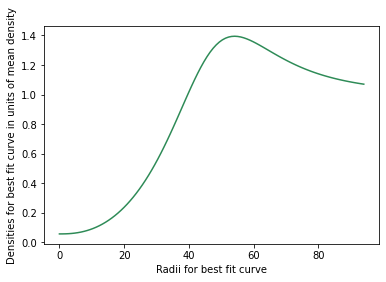

In [61]:
plt.plot(radii, hswprofile,'seagreen')
plt.xlabel('Radii for best fit curve')
plt.ylabel('Densities for best fit curve in units of mean density')

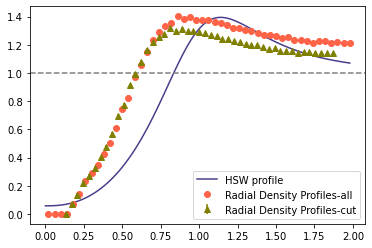

In [80]:
plt.plot(radii/median(bincen), hswprofile,'darkslateblue',label='HSW profile')
plt.plot(bincen/median(bincen),stack/mean(stack),'o',color='tomato',label='Radial Density Profiles-all')
plt.errorbar(x, y,yerr=s,color='olive',fmt='^',label='Radial Density Profiles-cut')
plt.axhline(y=1,color='grey',linestyle='--')
plt.legend(loc='lower right')

One-dimensional radial density profiles of stacked voids (points) and a best-fit curve (line) using the HSW profile.Each profile is normalized to the mean number density $\overline{n}$ of that sample and $R_{v}$ correspnds to the median void size in the stack. We ignore the first three bins for the fit. The universal shape of the profiles appear as such: central underdense floor, a steep wall, a slightly-overdense compensation, and a declining density that asymptotes to the mean density. Caption adapted from Stutter et al. 2014.


Paraphase: nothing in the void, some stuff, then a lot of stuff, then a normal amount of stuff

In [29]:
# return HSW profile for given sample density and void size
#   will interpolate/extrapole the radius

#  density: choice of sample (see arXiv:1309.5087):
#           maxDM: DM at 1 particles per cubic Mpc/h
#           fullDM: DM at 0.01 particles per cubic Mpc/h
#           denseDM: DM at 4.e-3 particles per cubic Mpc/h
#           sparseDM: DM at 3.e-4 particles per cubic Mpc/h
#           
#           denseHalos: halos at 4.e-3 particles per cubic Mpc/h
#           sparseHalos: halos at 3.e-4 particles per cubic Mpc/h
#          
#           denseGal: galaxies at 4.e-3 particles per cubic Mpc/h
#           sparseGal: galaxies at 3.e-4 particles per cubic Mpc/h
#
#  radius: void size in Mpc/h

# returns:
#   (rs, dc): best-fit values #effective radius? central density?
#   binCenters: array of radii in binned profile
#   stackedProfile: the density profile

bestfit, bincen2, stack2 = vide.getHSWProfile('maxDM',50)

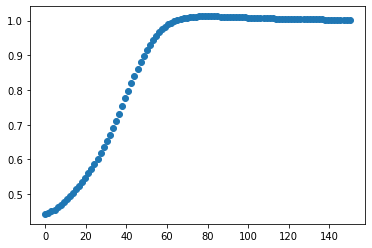

In [83]:
plt.plot(bincen2,stack2,'o')

In [81]:
bestfit

(array(1.28602908), array(-0.5569493))

In [34]:
#The statistical average void density profile
# fits the given density profile to the HSW function
#   radii: array of radii
#   densities: array of densities in units of mean density
#   sigmas: array of uncertainties
#   rV: mean effective void radius
# 
# returns:
#   popt: best-fit values of rs and dc
#   pcov: covariance matrix
#   rVals: array of radii for best-fit curve
#   hswProfile: array of densities for best-fit curve in units of mean density

y2 = stack2/mean(stack2)
s2 = np.std(stack2) / np.sqrt(len(stack2))

popt2, pcov2, radii2, hswprofile2 = vide.fitHSWProfile(bincen2,y2, s2, median(bincen2))

ValueError: `sigma` has incorrect shape.

In [40]:
np.std(stack2, axis=0)

0.19719933175422474

In [32]:
s

array([0.00175143, 0.0084826 , 0.00987282, 0.0116085 , 0.01145924,
       0.01148814, 0.01162341, 0.01207151, 0.01227048, 0.01347741,
       0.01331821, 0.01375171, 0.01368678, 0.01355834, 0.01301176,
       0.01315104, 0.01301553, 0.01200441, 0.01174359, 0.0104652 ,
       0.01041805, 0.00992931, 0.00927343, 0.00867217, 0.00827203,
       0.00815323, 0.00726355, 0.00707779, 0.00689945, 0.00663519,
       0.00647868, 0.00614224, 0.00619961, 0.00597735, 0.00575825,
       0.00555112, 0.00549415, 0.00543155, 0.00509821, 0.00501372,
       0.00474083, 0.00472191, 0.00467552, 0.00467403, 0.00443642,
       0.00423802, 0.00416711], dtype=float32)

In [35]:
s2

0.019719933175422474

In [ ]:
s = sigma[3:] #we dont want to 0's
r = bincen[3:]
d = stack[3:]


mr = median(r)
md = mean(d)

x = r/mr
y = d/md

In [60]:
# builds a stack of voids from the given catalog
#   catalog: void catalog
#   stackMode:
#     "ball": spherical cut
#     "voronoi": only void member particles
#
# returns:
#   stackedPart: array of relative particle positions in the stack


s = vide.stackVoids(cen_trim)

In [40]:
#plot a slice from a single void and its environment 
#blue circles are void member galaxies where radii is the is equal to the effctive radii of their voronoi cells 

#vide.plotVoidCells(cen_trim,89,figDir=figpath)

#bg particles binned, density in log scale, 0 white and 1.5 black 
#the warning msg has to do with the eps file generated 

Figure ???. A void indentified in real space (blue circles) from the mock catalog of central, trimmed voids. The background particles are binned and the corresponding density is shown on a logarithmic scale from 0.0 (white) to 1.5 (black). Caption adapted from Figure 6 Stutter et al. 2014.

The void member galaxies are shown as small semi-transparent disks with radii equal to the effective radii of their corresponding Voronoi cells.

## Working with SDSS ##

In [5]:
path2 = '/global/cscratch1/sd/chanun/void_catalog_2015.03.31/figures'
datafile = os.path.join(path2, "fig5_all.dat")
test = np.loadtxt(datafile)

In [14]:
#tpath = '/global/cscratch1/sd/chanun/void_catalog_2015.03.31/lanl/lanl_halos_minnone_pv/sample_lanl_halos_minnone_pv_z0.53_d00'
tpath = '/global/cscratch1/sd/chanun/void_catalog_2015.03.31/mock1024/mt_halos_minnone/sample_mt_halos_minnone_z0.00_d00'

In [15]:
testcenuntrim = vide.loadVoidCatalog(tpath, dataPortion="central", loadParticles=True,untrimmed=True)

ModuleNotFoundError: No module named 'void_python_tools'